In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [3]:
protein = '1fme'
# md_t2 = {'1fme': 18*1000}
lag = 41
process = 2


In [4]:
summary_1fme = '/Users/robertarbon/Library/CloudStorage/GoogleDrive-robert.arbon@gmail.com/My Drive/msm_optimisation/1fme/summary.h5'
summary_cln = '/Users/robertarbon/Library/CloudStorage/GoogleDrive-robert.arbon@gmail.com/My Drive/msm_optimisation/msm_opt/CLN/summary.h5'
hp_path = '/Users/robertarbon/Library/CloudStorage/GoogleDrive-robert.arbon@gmail.com/My Drive/msm_optimisation/hpsample.h5'

In [5]:

def get_timescales(hp_path, summary_path):

    hp = pd.read_hdf(hp_path)
    hp.reset_index(inplace=True)
    for drop_col in ['index', 'Group']:
        if drop_col in hp.columns:
            hp.drop(labels=[drop_col], inplace=True, axis=1)
    
    
    timescales = pd.read_hdf(summary_path, key='timescales')
    timescales.reset_index(inplace=True)
    for drop_col in ['index', 'Group']:
        if drop_col in timescales.columns:
            timescales.drop(labels=[drop_col], inplace=True, axis=1)
    
    timescales = timescales.merge(hp, on=['hp_ix'], how='left')
    timescales['feature'] = timescales.apply(lambda x: f"{x['feature__value']}" if x['feature__value'] =='dihedrals' else f"{x['distances__transform']}-{x['feature__value']}", axis=1)
    print(timescales.shape)
    timescales.drop_duplicates(inplace=True)
    print(timescales.shape)
    timescales = timescales.loc[timescales.hp_ix < 329, :].copy()

    data=timescales.query("process==2").query('lag==41')
    data.sort_values(by='median', inplace=True, axis=0, ascending=False)
    data['rank'] = (np.arange(data.shape[0])+1).astype(int)

    short_names = {'dihedrals': 'dihed.','logistic-distances': 'logit(dist.)', 'linear-distances': 
              'dist.'}

    def f(x):
        for short, long in short_names.items(): 
            x = x.replace(short, long)
        return x
    
    data['feature'] = data['feature'].apply(f)
    # timescales['feature'] = timescales['feature'].apply(f)
    return data


In [6]:
data_dict = {'BBA': get_timescales(hp_path, summary_1fme), 
        'CLN025': get_timescales(hp_path, summary_cln)}

(68711, 21)
(68711, 21)
(4979, 21)
(4979, 21)


In [7]:
data = data_dict['BBA']

In [8]:
data.sort_values(by='median', ascending=False).loc[:, ['median', 'lb', 'ub',  'hp_ix','distances__scheme', 'tica__dim', 'tica__lag', 'cluster__k', 'distances__steepness', 'distances__centre']].head(12)

,median,lb,ub,hp_ix,distances__scheme,tica__dim,tica__lag,cluster__k,distances__steepness,distances__centre
59276,20430.946382,2322.090873,176211.392199,24,ca,20.0,60.0,471.0,6.081760,0.224891
14941,9658.132641,2085.490379,188712.937937,262,ca,18.0,67.0,289.0,29.030558,0.798204
43168,8025.668786,2365.043846,194255.915039,235,ca,19.0,90.0,499.0,21.897952,0.859444
47727,7986.882735,2260.804189,170044.563505,241,ca,13.0,94.0,452.0,21.715837,0.811137
39675,7753.871000,2201.046421,104722.664950,157,closest-heavy,19.0,20.0,459.0,5.967568,0.740145
16322,7222.019294,2235.302541,90057.644710,175,closest-heavy,20.0,22.0,489.0,42.553700,0.591785
33298,6602.145996,2427.443526,150356.909967,85,ca,19.0,52.0,485.0,0.000000,0.000000
36048,6323.108619,2133.143713,111124.015002,34,closest-heavy,16.0,72.0,483.0,15.093771,0.760758
5980,6315.704964,2319.850066,121772.775786,272,closest-heavy,18.0,4.0,489.0,27.670355,0.543858
64368,6153.855999,2059.476524,120791.299517,88,ca,12.0,34.0,245.0,4.939269,0.224174


In [69]:
data.query('hp_ix==227').loc[:,  ['median', 'lb', 'ub',  'hp_ix','distances__scheme', 
                                       'tica__dim', 'tica__lag', 'cluster__k', 'distances__steepness', 
                                       'distances__centre']]

,median,lb,ub,hp_ix,distances__scheme,tica__dim,tica__lag,cluster__k,distances__steepness,distances__centre
40491,2002.76713,1710.990951,2962.403914,227,closest-heavy,3.0,25.0,169.0,1.653668,0.864427


In [52]:
def label(x): 
    # msg = f"\SI{{{x['median']/1000:3.1f}}}{{\{'micro'}\{'second'}}}" 
    # msg += ' \\\ '
    # msg += f"(\SIrange{{{x['lb']/1000:3.1f}}}{{{x['ub']/1000:3.1f}}}{{\{'micro'}\{'second'}}})"
    msg = f"\makecell[tc]{{{x['median']/1000:3.1f} \\\ ({x['lb']/1000:3.1f}, {x['ub']/1000:3.1f})}}"
    return msg
    

In [67]:
print(data.query('hp_ix==85').apply(label, axis=1).values[0])

\makecell[tc]{6.6 \\ (2.4, 150.4)}


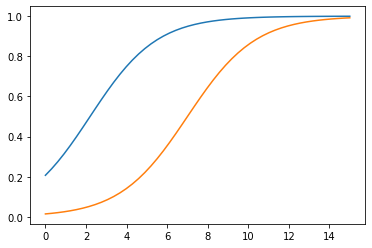

In [45]:
x = np.linspace(0, 1.5)
y1 = 1/(1+np.exp(-6.1*(x - 0.22)))
y2 = 1/(1+np.exp(-6.0*(x-0.70)))
plt.plot(x*10, y1)
plt.plot(x*10, y2)

In [6]:
np.log10(data['median'].min()), np.log10(data['median'].max())

(2.580698985123864, 4.38223954718102)

In [7]:
np.mean(data['ub']>md_t2[protein]), np.sum(data['ub']>md_t2[protein]), 

(0.4965986394557823, 73)

In [8]:
((data['median']/md_t2[protein]-1)*100).head()

64511    33.957503
67261    33.957503
68361    33.346834
67811    33.346834
65611    31.528225
Name: median, dtype: float64

In [9]:
data['median'].head()

64511    24112.350456
67261    24112.350456
68361    24002.430197
67811    24002.430197
65611    23675.080545
Name: median, dtype: float64

In [11]:
data.loc[data['median'] > 15000, ['hp_ix', 'median', 'tica__dim', 'tica__lag', 'cluster__k', 
                                 'distances__steepness', 'distances__centre']]

,hp_ix,median,tica__dim,tica__lag,cluster__k,distances__steepness,distances__centre
64511,333,24112.350456,16,38,469,5.967568,0.700806
67261,331,24112.350456,17,38,459,5.967568,0.700806
68361,329,24002.430197,17,38,469,5.967568,0.700806
67811,332,24002.430197,17,38,489,5.967568,0.700806
65611,335,23675.080545,19,38,479,5.967568,0.700806
66161,338,23363.471334,19,38,469,5.967568,0.700806
63411,330,23363.471334,17,38,479,5.967568,0.700806
62861,336,22784.212602,18,38,469,5.967568,0.700806
63961,334,22371.078033,18,38,479,5.967568,0.700806
66711,339,20898.344072,16,55,469,5.967568,0.700806
